In [7]:
import os
import sys
import numpy as np

In [ ]:

sys.path.append('/Users/thorsten/code/ThorstenCodes/MorphoMind/')
from data_handling.params import LOCAL_DATA_PATH
channels = ['ERSyto', 'ERSytoBleed', 'Hoechst', 'Mito', 'Ph_golgi']
#the base_dir should be the path to the raw data and the plate which should be stitched
platenr = '24277'
base_dir = os.path.join(LOCAL_DATA_PATH, f'{platenr}')


In [3]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Path to your SQLite database
db_path = '/Users/antonialutz/.morpho_minds_data/24277/raw/24277.sqlite'

# SQL query
query = """
SELECT "TableNumber",
    "ImageNumber",
    "ObjectNumber",
    "Cells_AreaShape_Area",
    "Cells_AreaShape_Compactness",
    "Cells_AreaShape_Eccentricity",
    "Cells_AreaShape_EulerNumber",
    "Cells_AreaShape_Extent",
    "Cells_AreaShape_FormFactor",
    "Cells_AreaShape_MaxFeretDiameter",
    "Cells_AreaShape_MinFeretDiameter",
    "Cells_AreaShape_MeanRadius",
    "Cells_AreaShape_MedianRadius",
    "Cells_AreaShape_Orientation",
    "Cells_AreaShape_Perimeter",
    "Cells_AreaShape_Solidity",
    "Cells_Children_Cytoplasm_Count",
    "Cells_AreaShape_Zernike_0_0",
    "Cells_Granularity_10_RNA"
FROM Cells
"""

# Connect to the database
conn = sqlite3.connect(db_path)

# Execute the query and load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [14]:
df.head()

,TableNumber,ImageNumber,ObjectNumber,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_EulerNumber,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MaxFeretDiameter,Cells_AreaShape_MinFeretDiameter,Cells_AreaShape_MeanRadius,Cells_AreaShape_MedianRadius,Cells_AreaShape_Orientation,Cells_AreaShape_Perimeter,Cells_AreaShape_Solidity,Cells_Children_Cytoplasm_Count,Cells_AreaShape_Zernike_0_0,Cells_Granularity_10_RNA,Cluster
0,e4fc147ee33a9b21160600682984c819,1,1,3892,1.305007,0.710394,1.0,0.547860,0.234195,107.004673,73.000000,12.208260,10.295630,33.071347,456.986,0.804382,1,0.414291,2.74512,4
1,e4fc147ee33a9b21160600682984c819,1,2,1528,1.349862,0.863146,1.0,0.502962,0.365444,65.855903,32.484574,5.685817,5.000000,-28.422515,229.222,0.850780,1,0.435827,4.212556,2
2,e4fc147ee33a9b21160600682984c819,1,3,2566,1.153993,0.768326,1.0,0.633580,0.469317,76.400262,50.835600,7.778037,7.000000,-23.818618,262.120,0.853910,1,0.553874,3.12502,1
3,e4fc147ee33a9b21160600682984c819,1,4,2132,1.3078,0.855375,1.0,0.612116,0.376735,86.539009,42.000000,6.788021,6.000000,-69.998409,266.674,0.834442,1,0.362471,4.347864,2
4,e4fc147ee33a9b21160600682984c819,1,5,4475,2.502784,0.965288,1.0,0.330210,0.253568,154.896740,49.131743,7.243892,6.403124,-46.937397,470.928,0.752797,1,0.237475,2.390689,0


In [15]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_features = imputer.fit_transform(df.iloc[:, 3:])  # Assuming missing values are in the features

In [16]:
# Standardize the features after imputation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)


In [17]:
# Now you can perform clustering with KMeans as before, without the NaN issue
n_clusters = 5  # Adjust based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [18]:
# Now df includes a 'Cluster' column indicating the cluster each cell belongs to
print(df.head())

                        TableNumber  ImageNumber  ObjectNumber  \
0  e4fc147ee33a9b21160600682984c819            1             1   
1  e4fc147ee33a9b21160600682984c819            1             2   
2  e4fc147ee33a9b21160600682984c819            1             3   
3  e4fc147ee33a9b21160600682984c819            1             4   
4  e4fc147ee33a9b21160600682984c819            1             5   

   Cells_AreaShape_Area Cells_AreaShape_Compactness  \
0                  3892                    1.305007   
1                  1528                    1.349862   
2                  2566                    1.153993   
3                  2132                      1.3078   
4                  4475                    2.502784   

  Cells_AreaShape_Eccentricity  Cells_AreaShape_EulerNumber  \
0                     0.710394                          1.0   
1                     0.863146                          1.0   
2                     0.768326                          1.0   
3                   

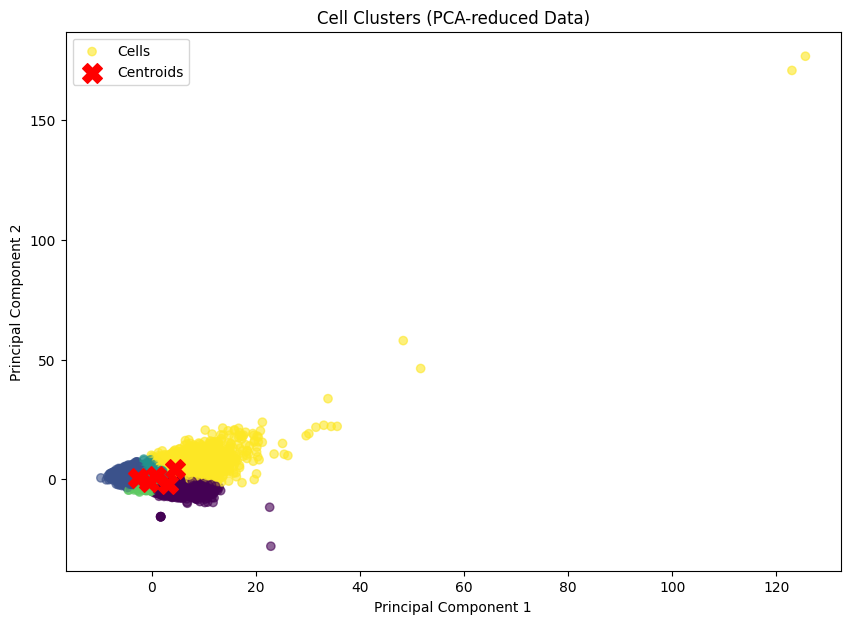

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dataset to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Extract cluster centers and transform them with the same PCA
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.6, label='Cells')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('Cell Clusters (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

In [22]:
# Function to remove outliers using IQR method
def remove_outliers(df, features, threshold_multiplier=1.5):
    df_cleaned = df.copy()
    for feature in features:
        # Convert column to numeric type
        df_cleaned[feature] = pd.to_numeric(df_cleaned[feature], errors='coerce')
        # Drop NaN values after conversion
        df_cleaned = df_cleaned.dropna(subset=[feature])
        # Calculate quartiles and IQR
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold_multiplier * IQR
        upper_bound = Q3 + threshold_multiplier * IQR
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    return df_cleaned

# Remove outliers from the cluster
cluster_without_outliers = remove_outliers(df, df.columns[:-1])  # Excluding the 'Cluster' column